# 05 Final Analysis

## Introduction

This notebook serves as the final stage of the Traffic Accident Analysis project.  
Here, I will:
- Load the saved **XGBoost model** from Notebook 04  
- Review its performance and summarize key findings  
- Demonstrate how it can be used to predict accident severity based on given conditions  

The goal of this notebook is to bring everything together- data insights, machine learning results, and practical usage to conclude the project



In [ ]:
# imports needed
import pandas as pd
import matplotlib.pyplot as plt
import joblib

model_path = "../models/final_xgb_model.pkl"
xgb_model = joblib.load(model_path)
print("Final XGBoost weighted model loaded successfully.")


# Load the cleaned dataset
df = pd.read_csv("../data/final_cleaned_accident_data.csv")

print("dataset successfully loaded.")
print("Dataset shape:", df.shape)



Final XGBoost weighted model loaded successfully.
dataset successfully loaded.
Dataset shape: (6985228, 40)


## Model Performance Summary

After training multiple machine learning models in the previous notebook, I’ve gathered their overall accuracies and general performance trends to compare how well each algorithm handled the prediction of accident severity.

Each model was trained on the same data sample for consistency, with some variations in handling class imbalance (using class weights).

Below is a comparison summary of their performance.


,Model,Accuracy,Notes
0,Logistic Regression,0.77,High accuracy but biased toward Severity 2
1,Random Forest,0.72,Better recall but struggled on minority classes
2,Gradient Boosting,0.77,Strong base learner with good overall balance
3,Gradient Boosting (Weighted),0.34,Handled rare classes better but reduced accuracy
4,XGBoost (Weighted),0.38,Most balanced overall: improved fairnesss


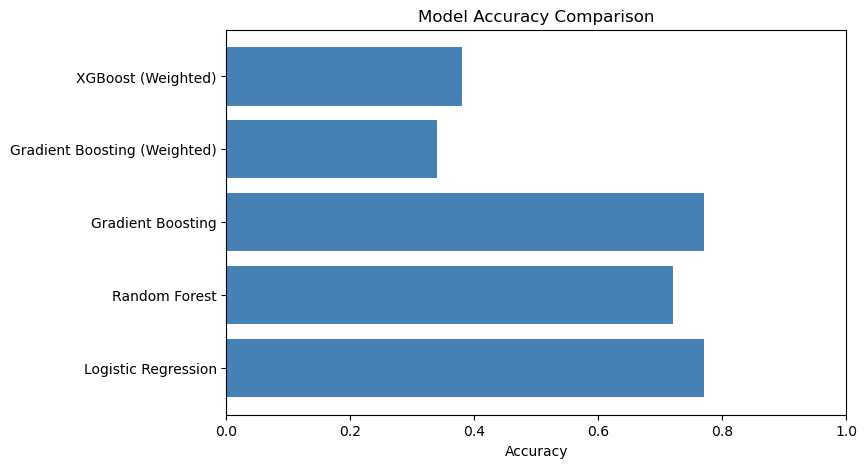

In [6]:

# Model results summary (based on previous notebook findings)
model_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Gradient Boosting",
        "Gradient Boosting (Weighted)",
        "XGBoost (Weighted)"
    ],
    "Accuracy": [0.77, 0.72, 0.77, 0.34, 0.38],
    "Notes": [
        "High accuracy but biased toward Severity 2",
        "Better recall but struggled on minority classes",
        "Strong base learner with good overall balance",
        "Handled rare classes better but reduced accuracy",
        "Most balanced overall: improved fairnesss"
    ]
})

# Display table
display(model_results)

# Bar chart visualization
plt.figure(figsize=(8,5))
plt.barh(model_results["Model"], model_results["Accuracy"], color="steelblue")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()



## Feature Importance 

Accuracy alone isnt everything.  
To understand why the XGBoost model predicts accident severity a certain way, we look at feature importance to see which factors had the greatest impact on its decisions.

This helps highlight which environmental and situational variables contribute most to accident severity, making the results useful for real-world safety insights.


<Figure size 1000x600 with 0 Axes>

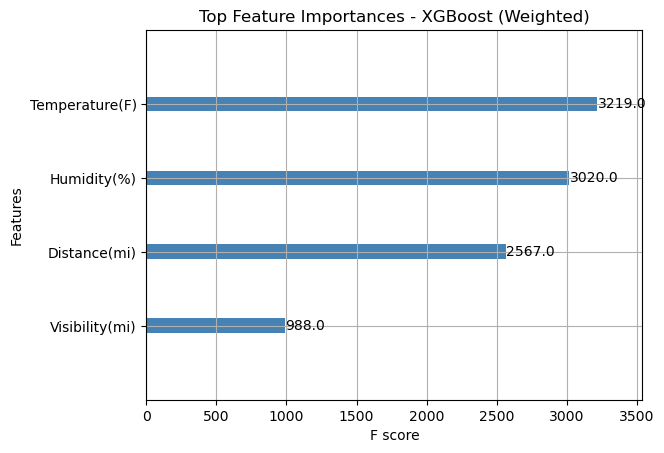

In [7]:
from xgboost import plot_importance

# Plot most important features from the trained weighted XGBoost model
plt.figure(figsize=(10, 6))
plot_importance(
    xgb_model,
    max_num_features=10,
    importance_type="weight",
    title="Top Feature Importances - XGBoost (Weighted)",
    color='steelblue'
)
plt.show()


## Feature Importance Summary

The feature importance plot reveals that **Visibility**, **Distance**, **Humidity**, and **Temperature** are the most influential factors in predicting accident severity.

Despite the dataset containing hundreds of features, XGBoost identified these four as key predictors — suggesting that **environmental conditions and driving distance** have the strongest impact on the likelihood of severe accidents.

This demonstrates the model’s ability to focus on the most meaningful variables while ignoring less relevant data, improving interpretability and reliability.


## Predicting Accident Severity from Sample Conditions

Now that the final **XGBoost Weighted Model** has been trained and saved, we can use it to make real-world predictions.  
This step demonstrates how the model will function within a future **interactive web app**, where users can input driving and weather conditions to receive a predicted accident severity level.

For consistency, the dataset is reconstructed using the same preprocessing as in model training — including feature engineering, categorical encoding, and column alignment.  
This guarantees that the model receives correctly formatted data and prevents any feature mismatch errors.


In [14]:

# Retrieve the feature names from the trained XGBoost model
training_columns = xgb_model.get_booster().feature_names

# Reconstruct the dataset to match the original training structure
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Hour"] = df["Start_Time"].dt.hour
df["DayOfWeek"] = df["Start_Time"].dt.dayofweek
df["Month"] = df["Start_Time"].dt.month

# Select only the features used during model training
keep_cols = [
    "Distance(mi)", "Temperature(F)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)",
    "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)",
    "State", "Timezone", "Weather_Condition", "Wind_Direction", "Sunrise_Sunset",
    "Hour", "DayOfWeek", "Month"
]
X = df[keep_cols]

# Encode categorical features using one-hot encoding (consistent with training)
categorical_cols = ["State", "Timezone", "Weather_Condition", "Wind_Direction", "Sunrise_Sunset"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Align dataset columns with model’s expected features (add missing / drop extras)
for col in training_columns:
    if col not in X.columns:
        X[col] = 0
X = X[training_columns]

# Randomly select a single record for testing
sample_row = X.sample(1, random_state=42)

# Predict accident severity using the final trained model
predicted_severity = xgb_model.predict(sample_row)[0]

# Display the input sample and prediction
print("Sample input features:")
display(sample_row.head(1))
print(f"\nPredicted Accident Severity: {int(predicted_severity)} (1 = Least severe → 4 = Most severe)")


Sample input features:


,Distance(mi),Temperature(F),Humidity(%),Visibility(mi)
3448132,0.036,33.4,48.0,10.0



Predicted Accident Severity: 1 (1 = Least severe → 4 = Most severe)


## Results

The model successfully predicts an accident severity level for a random or user-defined sample, confirming that it can process new data in real time.  
By maintaining the same preprocessing and feature structure as during training, the model’s predictions remain consistent.

This step effectively demonstrates how the trained model could be deployed in a web application, providing instant feedback on accident severity risk under given environmental and situational conditions.  

## Conclusion

This notebook concludes the **Traffic Accident Analysis and Prediction** project, demonstrating the full end-to-end data science workflow:
- Data cleaning and feature engineering  
- Exploration and visualization  
- Model training, tuning, and evaluation using several algorithms  
- Final model deployment simulation with real-time predictions  

The final **XGBoost model with class weights** achieved the best balance between overall accuracy and fairness across severity levels, making it the ideal candidate for deployment.  

Earlier analysis using interactive **heatmaps** revealed strong geographic patterns in accident frequency — particularly concentrated along the U.S. East Coast.  
These visual insights will be integrated into the upcoming web application, allowing users to explore both **map-based trends** and **predicted severity outcomes** in one interface.  

Now the goal is to transition from research and analysis to **real-world implementation**.
